In [ ]:
"""
Install Yahoo! Finance's API to get finance market data
NASDAQ (USA Stock Exchange)
"""
!pip install yfinance --upgrade --no-cache-dir

In [2]:
# NECESSARY LIBRARIES

# >> Data Analysis Packages
import numpy as np
import pandas as pd
import pandas_datareader.data as web

# >> Graphics Package
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# >> Data Function
from datetime import datetime

# >> YFinance
import yfinance as yf
yf.pdr_override()

# >> Warnings
import warnings
warnings.filterwarnings('ignore')

# **API Yahoo Finance**
Analyzing market stocks from EA Games within 1 (one) year.

In [3]:
# Collecting data from API
Data = web.get_data_yahoo('EA', period='1y')

# Shape of the data collected
Data.shape

[*********************100%***********************]  1 of 1 completed


(252, 6)

In [4]:
# Verifying the first 5 (five) registries
Data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-15,134.399994,135.460007,133.360001,134.500000,133.742142,1739100
2022-02-16,133.750000,134.600006,131.460007,133.289993,132.538971,2369300
2022-02-17,133.070007,133.070007,129.929993,130.399994,129.665253,1735700
2022-02-18,130.009995,131.169998,128.919998,129.330002,128.601273,2002000
2022-02-22,128.050003,129.639999,126.599998,127.089996,126.373894,2182600


In [5]:
# Last 5 (five) registries
Data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-09,113.459999,113.949997,111.389999,111.790001,111.790001,3079000
2023-02-10,111.860001,112.900002,111.410004,111.800003,111.800003,2904800
2023-02-13,111.470001,113.410004,111.470001,113.199997,113.199997,2552800
2023-02-14,112.809998,112.900002,111.570000,112.250000,112.250000,2662600
2023-02-15,111.279999,113.050003,111.279999,113.040001,113.040001,1069623


In [6]:
# Descriptive statistics
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,125.916468,127.355833,124.503968,125.937341,125.627858,2.185958e+06
std,5.592924,5.636486,5.615912,5.644152,5.568976,1.370385e+06
min,111.279999,112.900002,109.239998,111.599998,111.120789,7.813000e+05
25%,122.879997,124.135000,121.257500,122.782503,122.497101,1.498000e+06
50%,126.064999,127.639999,124.544998,126.185001,125.978382,1.828450e+06
75%,129.297497,130.600006,127.792500,129.169998,128.884411,2.379950e+06
max,141.460007,142.789993,140.160004,141.500000,140.892410,1.449230e+07


In [7]:
# Information about the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-15 to 2023-02-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


# **Moving Average**


### Understanding how the moving average works, before analyzing the data obtained.

In [8]:
# Simple Average
listAvg = [11, 12, 13, 15, 16, 17]

from statistics import mean
print(f'Mean: { mean(listAvg) }')
print(f'Mean: { (11+12+13+15+16+17) / len(listAvg) } ')

Mean: 14
Mean: 14.0 


In [9]:
# Calculating the Moving Average

days = 5

for Interval in range(1,4):
  print(f'{Interval}ª Day: {sum(listAvg[Interval:days])/5}')

1ª Day: 11.2
2ª Day: 8.8
3ª Day: 6.2


Text(0.5, 1.0, 'Closing Price')

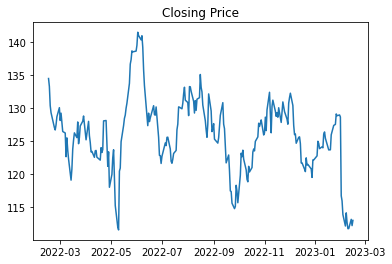

In [10]:
# Plot
plt.plot(Data['Close'])
plt.title('Closing Price')

### Moving Average with Rolling Function.
The function rolling() from Pandas, allows you to calculate statistics on sliding windows of data.<br>
It is very useful for calculating moving averages, standard deviations, summations, minimums and maximums, among other statistics.

In [11]:
# Import window module
from pandas.core import window

# Set period in days
Period = 5
Data['Close'].rolling( window= Period).mean().head(21)

Date
2022-02-15           NaN
2022-02-16           NaN
2022-02-17           NaN
2022-02-18           NaN
2022-02-22    130.921997
2022-02-23    129.365997
2022-02-24    128.207999
2022-02-25    127.870001
2022-02-28    128.022000
2022-03-01    128.234000
2022-03-02    128.741998
2022-03-03    128.809998
2022-03-04    128.365996
2022-03-07    127.599997
2022-03-08    126.503998
2022-03-09    125.755998
2022-03-10    124.923999
2022-03-11    124.092000
2022-03-14    122.665999
2022-03-15    122.292000
2022-03-16    121.948001
Name: Close, dtype: float64

Text(0.5, 0, 'Period')

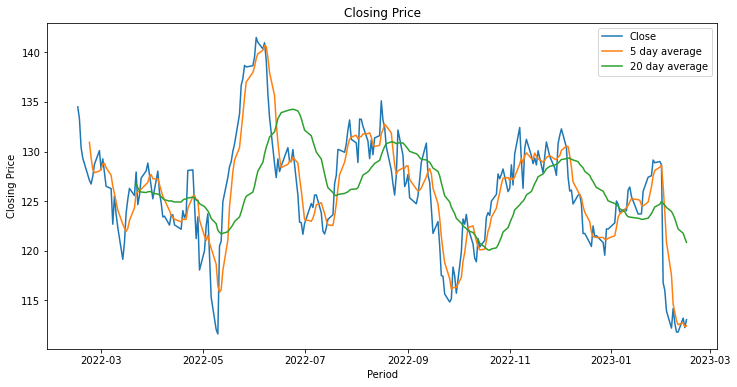

In [12]:
# Import window module
from pandas.core import window

# Set period in days
Period = 5
Data['Close'].rolling( window= Period).mean()

# Creating graph
plt.figure( figsize=(12, 6))

plt.plot(Data['Close']) # plot with all data
plt.plot(Data['Close'].rolling( window= Period).mean()) # plot with 5 (five) days window
plt.plot(Data['Close'].rolling( window= Period + 20).mean()) # plot with 25 (twenty five) days window
plt.title('Closing Price')
plt.legend(['Close', '5 day average', '20 day average'])
plt.ylabel('Closing Price')
plt.xlabel('Period')

#### Graphics using **plotly.express (px)** and **plotly.graph_objects (go)**
These two modules makes interactive graphics.

In [13]:
# First with plotly.express

Period = 5 # Period in days
Data['Moving Average'] = Data['Close'].rolling( window= Period).mean() # Create a new table called Moving Average

Figure = px.line(
    Data,
    y='Close',
    title='Close'
)

Figure.show()

In [14]:
# Second with plotly.graph_objects

Figure_02 = go.Figure(
    data=go.Scatter(
        x=Data.index,
        y=Data['Close'],
        line=( dict(color='firebrick', width=3))
    )
)

Figure_02.update_layout(
    title='Closing Analysis',
    xaxis_title='Period',
    yaxis_title='Closing Price'
)
Figure_02.show()

**Candlestick Charts**

In [15]:
# Making a Candlestick Chart using plotly.graph_objects
Candlestick_Graph = go.Figure(
    data=[
        go.Candlestick(
            x = Data.index,
            open = Data['Open'],
            high = Data['High'],
            low = Data['Low'],
            close = Data['Close'],
            increasing_line_color='cyan',
            decreasing_line_color='gray'
        )
    ]
)

Candlestick_Graph.update_layout(
    xaxis_rangeslider_visible=False,
    title='Closing Analysis',
    xaxis_title='Period',
    yaxis_title='Closing Price'
)

Candlestick_Graph.show()

# Creating Analysis Report

In [16]:
# Create figure

Figure = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Stock', 'Closing')
)

# Layout and Dimension
Figure.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics</b> <b>Follow-up Petrobras</b>'
)

# Adding a graph on first position
Figure.add_trace(
  go.Candlestick(
      x = Data.index,
      open = Data['Open'],
      high = Data['High'],
      low = Data['Low'],
      close = Data['Close'],
      increasing_line_color='red',
      decreasing_line_color='green'
  ),
  row = 1 , col = 1
)

Figure.add_trace(
    go.Scatter(
        x=Data.index,
        y=Data['Moving Average'],
        mode='lines',
        name='Moving Average',
        line=dict(color='yellow')
    ),
    row=1, col=1
)

Figure.update_layout(
    xaxis_rangeslider_visible=False,
)

# Adding a graph on second position
Figure.add_trace(
    go.Scatter(
        x=Data.index,
        y=Data['Close'],
        mode='lines',
        name='Closing',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figure.add_trace(
    go.Scatter(
        x=Data.index,
        y=Data['Moving Average'],
        mode='lines',
        name='Moving Average',
        line=dict(color='red')
    ),
    row=2, col=1
)

Figure.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

Figure.add_annotation(
    showarrow=False,
    text='Análise feita no evento de Python (07/02/2023) <br> Professor: Odemir Depieri Jr',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figure.add_annotation(
    showarrow=False,
    text='By: Társis Santos',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)


Figure.show()

# **Export report to PDF with Kaleido package**


In [17]:
# First install the package, after comment the line
#!pip install -U kaleido

Need to restart runtime environment after the installation, so can the PDF be exported. The report will be in the file area.

In [18]:
Figure.write_image('Financial_Report.pdf')